In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pre-processing the data 
df = pd.read_csv('MyRepo_CrewAI.csv')
df = df.sort_values(by = "ID", ascending = False)
df = df.reset_index(drop = True)
df

,ID,Title,Created Date,Updated Date,Author,Commits,Changed Files,Additions,Deletions,Status
0,739,helicone integration docs,2024-06-07 18:59:07+00:00,2024-06-07 18:59:07+00:00,chitalian,1,1,26,0,Open
1,735,Adding async support for tools,2024-06-05 05:05:57+00:00,2024-06-05 06:11:49+00:00,tg1482,2,2,103,4,Open
2,728,Update Memory.md,2024-06-03 21:21:49+00:00,2024-06-03 21:21:49+00:00,robbyriverside,1,1,6,1,Open
3,723,missing datetime import,2024-06-02 14:42:44+00:00,2024-06-02 15:53:34+00:00,strnad,1,1,1,1,Close
4,721,fix: agent_executor_callbacks,2024-06-02 07:53:54+00:00,2024-06-02 07:53:54+00:00,JayClock,1,1,2,1,Open
...,...,...,...,...,...,...,...,...,...,...
211,9,Update README.md,2023-12-22 03:35:45+00:00,2023-12-22 13:24:36+00:00,llxxxll,2,1,5,2,Close
212,7,Fix typo in readme for valid syntax in example...,2023-12-09 22:47:27+00:00,2023-12-18 04:10:49+00:00,shreyaskarnik,1,1,1,1,Close
213,3,fix typo in quickstart snippet,2023-11-17 18:12:33+00:00,2023-11-17 18:56:14+00:00,manuel-soria,2,1,2,2,Close
214,2,Adding crew specific verbose logs,2023-11-16 21:50:08+00:00,2023-11-16 22:17:18+00:00,joaomdmoura,6,5,61,8,Close


In [3]:
df["Status"].value_counts()

Status
Close    185
Open      31
Name: count, dtype: int64

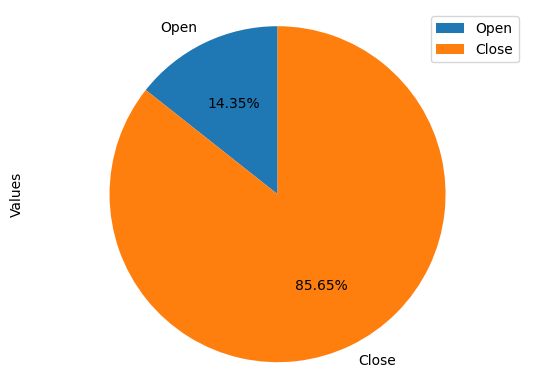

There are totally 216 pull requests with 31 still open and 185 closed.


In [4]:
# The graph for open and closed pull requests
STATUS = pd.DataFrame({
    "Category" : ["Open", "Close"],
    "Values" : [31, 185]
})
STATUS.plot.pie(y="Values", labels=STATUS["Category"], autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.show()
print("There are totally 216 pull requests with 31 still open and 185 closed.")

In [5]:
# The list of authors with the number of pull requests they have done
print ("There are totally 139 authors that have contributed to 216 pull requests as above.")
df["Author"].value_counts()

There are totally 139 authors that have contributed to 216 pull requests as above.


Author
joaomdmoura       14
greysonlalonde    10
pythonbyte         7
GabeKoga           6
gvieira            6
                  ..
whimo              1
dkhokhlov          1
Chillthrower       1
cmosta0            1
franzejr           1
Name: count, Length: 139, dtype: int64

<Axes: xlabel='Author'>

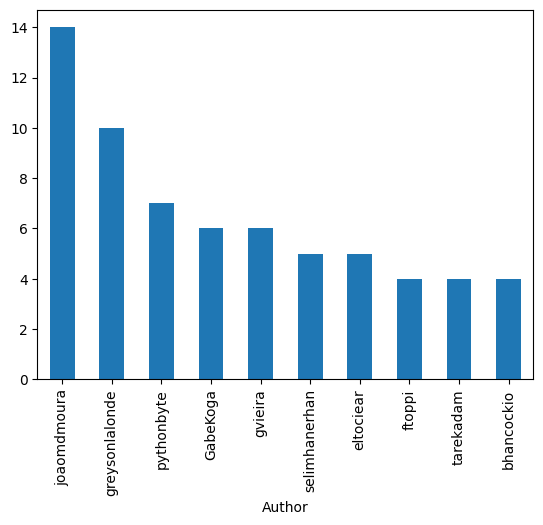

In [6]:
# The chart of 10 authors with the largest number of pull requests they have done
df["Author"].value_counts().iloc[:10].plot(kind = 'bar')

There have been 629 times that authors got access to commits in total.


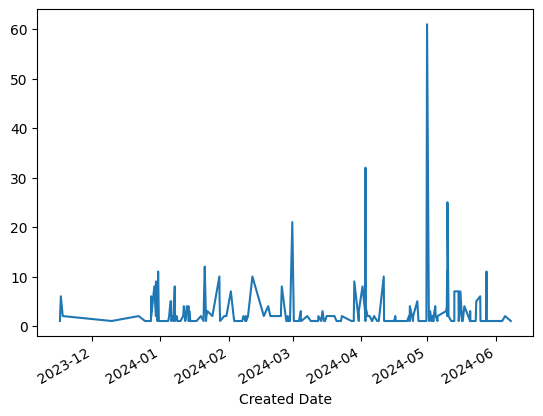

In [7]:
df["Created Date"] = pd.to_datetime(df["Created Date"])
df.set_index("Created Date", inplace = True)
# Draw the graph for the number of times author got access to commits
df["Commits"].plot()
print ("There have been " + str(df["Commits"].sum()) + " times that authors got access to commits in total.")

There have been 736 times that authors changed files in total.


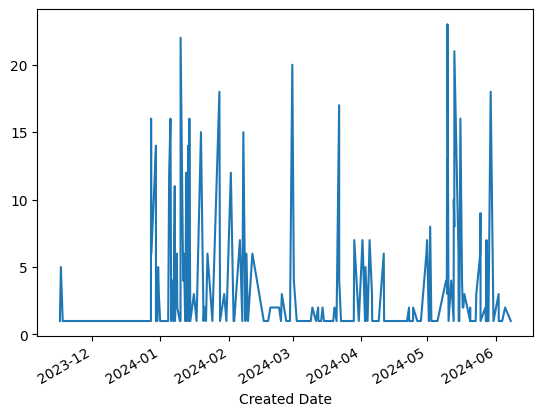

In [8]:
# Draw the graph for the number of times author changed files
df["Changed Files"].plot()
print("There have been " + str(df["Changed Files"].sum()) + " times that authors changed files in total.")

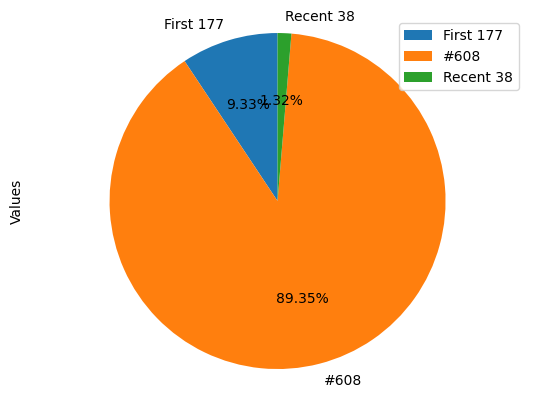

There have been 227984 lines of code added in total.


In [9]:
# The graph for the number of lines of code added in total 
add = pd.DataFrame({
    "Category" : ["First 177", "#608", "Recent 38"],
    "Values" : [21278, 203703, 3003]
})
add.plot.pie(y='Values', labels=add['Category'], autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.show()
print("There have been " + str(df["Additions"].sum()) + " lines of code added in total.")

There have been 21278 lines of code added in the first 177 pull requests.


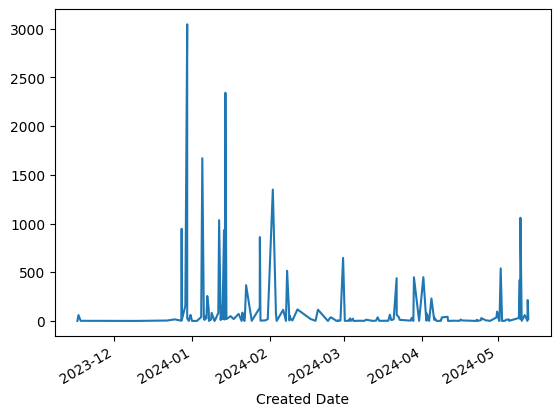

In [10]:
# The graph for the number of lines of code added in the first 177 pull requests 
df["Additions"].iloc[39:].plot()
print("There have been " + str(df["Additions"].iloc[39:].sum()) + " lines of code added in the first 177 pull requests.")

In [11]:
print("There have been " + str(df["Additions"].iloc[38].sum()) + " lines of code added in the #608 pull request.")

There have been 203703 lines of code added in the #608 pull request.


There have been 3003 lines of code added in 38 recent pull requests.


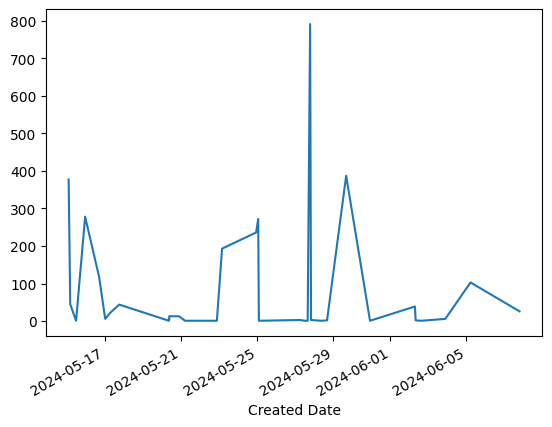

In [12]:
# The graph for the number of lines of code added in 38 recent pull requests 
df["Additions"].iloc[0:38].plot()
print("There have been " + str(df["Additions"].iloc[0:38].sum()) + " lines of code added in 38 recent pull requests.")

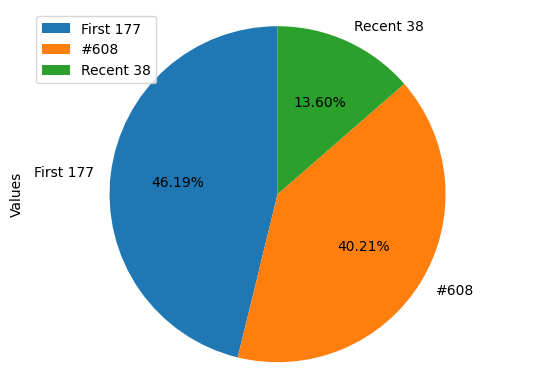

There have been 7928 lines of code deleted in total.


In [13]:
# The graph for the number of lines of code deleted in total 
delete = pd.DataFrame({
    "Category" : ["First 177", "#608", "Recent 38"],
    "Values" : [3662, 3188, 1078]
})
delete.plot.pie(y='Values', labels=delete['Category'], autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.show()
print("There have been " + str(df["Deletions"].sum()) + " lines of code deleted in total.")

There have been 3662 lines of code deleted in the first 177 pull requests.


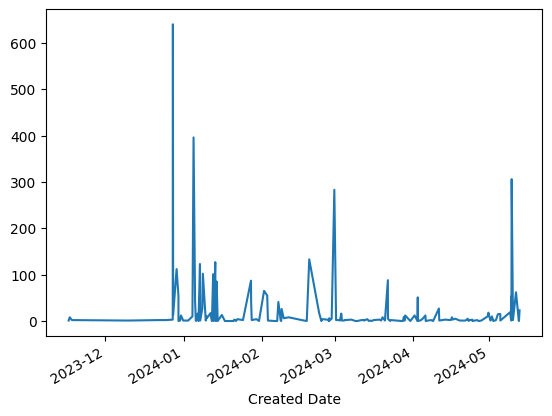

In [14]:
# The graph for the number of lines of code deleted in the first 177 pull requests 
df["Deletions"].iloc[39:].plot()
print("There have been " + str(df["Deletions"].iloc[39:].sum()) + " lines of code deleted in the first 177 pull requests.")

In [15]:
print("There have been " + str(df["Deletions"].iloc[38].sum()) + " lines of code deleted in the #608 pull request.")

There have been 3188 lines of code deleted in the #608 pull request.


There have been 1078 lines of code deleted in 38 recent pull requests.


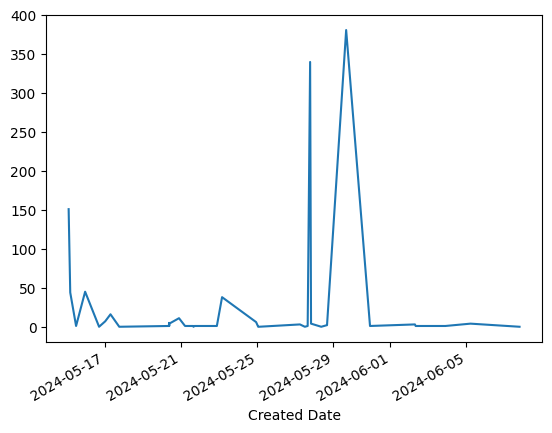

In [16]:
# The graph for the number of lines of code deletions in 38 recent pull requests 
df["Deletions"].iloc[0:38].plot()
print("There have been " + str(df["Deletions"].iloc[0:38].sum()) + " lines of code deleted in 38 recent pull requests.")